In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

## 데이터 살펴보기

* Cookie: Randomly generated customer id enabling us to tie subsequent visits back to the same customer
* Timestamp: Date and time when the visit took place
* Interaction: Categorical variable indicating the type of interaction that took place
* Conversion: Boolean variable indicating whether a conversion took place
* Conversion Value: Value of the potential conversion event
* Channel: The marketing channel that brought the customer to our site


In [2]:
df = pd.read_csv('attribution_data.csv')

In [3]:
df

,cookie,time,interaction,conversion,conversion_value,channel
0,00000FkCnDfDDf0iC97iC703B,2018-07-03T13:02:11Z,impression,0,0.0,Instagram
1,00000FkCnDfDDf0iC97iC703B,2018-07-17T19:15:07Z,impression,0,0.0,Online Display
2,00000FkCnDfDDf0iC97iC703B,2018-07-24T15:51:46Z,impression,0,0.0,Online Display
3,00000FkCnDfDDf0iC97iC703B,2018-07-29T07:44:51Z,impression,0,0.0,Online Display
4,0000nACkD9nFkBBDECD3ki00E,2018-07-03T09:44:57Z,impression,0,0.0,Paid Search
...,...,...,...,...,...,...
586732,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-12T23:50:45Z,impression,0,0.0,Online Display
586733,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-12T23:50:54Z,impression,0,0.0,Online Display
586734,ooooiBh70D3k3BfAhDFfii9h7,2018-07-03T12:57:25Z,impression,0,0.0,Paid Search
586735,ooooiBh70D3k3BfAhDFfii9h7,2018-07-19T08:17:59Z,impression,0,0.0,Online Video


In [6]:
df.interaction.value_counts()

impression    569098
conversion     17639
Name: interaction, dtype: int64

In [8]:
df.channel.value_counts()

Facebook          175741
Paid Search       151440
Online Video      113302
Instagram          75201
Online Display     71053
Name: channel, dtype: int64

In [9]:
df.iloc[80:100,:]

,cookie,time,interaction,conversion,conversion_value,channel
80,000fhi3BhoFoECEkCECkB7iDk,2018-07-04T09:28:23Z,impression,0,0.0,Paid Search
81,000fhi3BhoFoECEkCECkB7iDk,2018-07-04T09:30:09Z,impression,0,0.0,Paid Search
82,000fhi3BhoFoECEkCECkB7iDk,2018-07-09T13:14:23Z,impression,0,0.0,Paid Search
83,000h3n9nC0hFhE3CCnkkAof7n,2018-07-19T14:31:57Z,conversion,1,6.0,Facebook
84,000hBihC9o30A9fi7BhFDnhn0,2018-07-04T23:13:38Z,impression,0,0.0,Paid Search
85,000hBihC9o30A9fi7BhFDnhn0,2018-07-23T23:01:56Z,impression,0,0.0,Online Display
86,000hCBnCB7oi7ADAEnEBCnBEE,2018-07-07T14:34:54Z,impression,0,0.0,Online Video
87,000hCBnCB7oi7ADAEnEBCnBEE,2018-07-07T14:35:22Z,impression,0,0.0,Online Video
88,000hCBnCB7oi7ADAEnEBCnBEE,2018-07-13T20:21:34Z,impression,0,0.0,Online Video
89,000hCBnCB7oi7ADAEnEBCnBEE,2018-07-13T20:29:35Z,impression,0,0.0,Online Video


## 유저(쿠키)별로 보통 몇 개의 채널에 노출되었는지 확인하기

In [11]:
df_channels_per_cookie = df.groupby('cookie').channel.nunique().reset_index()
df_channels_per_cookie.head()

,cookie,channel
0,00000FkCnDfDDf0iC97iC703B,2
1,0000nACkD9nFkBBDECD3ki00E,1
2,0003EfE37E93D0BC03iBhBBhF,1
3,00073CFE3FoFCn70fBhB3kfon,1
4,00079hhBkDF3k3kDkiFi9EFAD,1


## 채널수 별 유저수 확인하기

In [12]:
df_channels_per_cookie.groupby('channel').count()

,cookie
channel,
1,183020
2,45964
3,9549
4,1473
5,102


# 도메인 지식을 활용한 채널 기여도 분석

* 도메인 지식을 활용한다 = 우리가 기존에 알고 있는, 또는 기존에 잘 알려진 방법론을 사용해 본다
* 어떤 채널이 전환에 대한 기여도가 높았느지 살펴보자

# Last Interaction Attribution Model
* 마지막으로 노출/클릭한 채널의 기여도를 100%로 계산한다

In [15]:
df_last_interaction = df.drop_duplicates('cookie', keep='last')[['cookie', 'channel', 'conversion']]
df_last_interaction

,cookie,channel,conversion
3,00000FkCnDfDDf0iC97iC703B,Online Display,0
9,0000nACkD9nFkBBDECD3ki00E,Paid Search,0
14,0003EfE37E93D0BC03iBhBBhF,Paid Search,0
15,00073CFE3FoFCn70fBhB3kfon,Instagram,0
16,00079hhBkDF3k3kDkiFi9EFAD,Paid Search,0
...,...,...,...
586729,ooooE0hkAFBkED90ChDDiBFAf,Online Display,0
586730,ooooEBE0o0D97ACAAAnDoi3F0,Online Display,0
586733,ooooEiB0CCoEf9fiiC90Dfhfk,Online Display,0
586735,ooooiBh70D3k3BfAhDFfii9h7,Online Video,0


In [16]:
df.loc[df.cookie == '00000FkCnDfDDf0iC97iC703B']

,cookie,time,interaction,conversion,conversion_value,channel
0,00000FkCnDfDDf0iC97iC703B,2018-07-03T13:02:11Z,impression,0,0.0,Instagram
1,00000FkCnDfDDf0iC97iC703B,2018-07-17T19:15:07Z,impression,0,0.0,Online Display
2,00000FkCnDfDDf0iC97iC703B,2018-07-24T15:51:46Z,impression,0,0.0,Online Display
3,00000FkCnDfDDf0iC97iC703B,2018-07-29T07:44:51Z,impression,0,0.0,Online Display


In [17]:
df_last_interaction.loc[df.cookie == '00000FkCnDfDDf0iC97iC703B']

,cookie,channel,conversion
3,00000FkCnDfDDf0iC97iC703B,Online Display,0


### 전환이 된 경우 마지막으로 접한 채널이 무엇인지 가져오자

In [19]:
df_last_interaction_conv = df_last_interaction[df_last_interaction.conversion == 1]
df_last_interaction_conv

,cookie,channel,conversion
22,0007oEBhnoF97AoEE3BCkFnhB,Paid Search,1
23,00090n9EBBEkA000C7Cik999D,Facebook,1
83,000h3n9nC0hFhE3CCnkkAof7n,Facebook,1
109,000hCBnCB7oi7ADAEnEBCnBEE,Online Video,1
124,000kiDB3D0fCfDAohCDB3ohko,Facebook,1
...,...,...,...
586663,oooEAi9EoC7F3A33037h0khk3,Online Video,1
586690,oooh7FDi0hBnEDBii70hfEf93,Online Display,1
586701,oooik3A7A7FA9oof3hDfin7CB,Online Display,1
586707,oookCEDh03D7oo3f0FkB799E7,Online Video,1


In [20]:
last_interaction_attrib = df_last_interaction_conv.groupby('channel')['cookie'].count().reset_index().rename(columns={'cookie': 'attribution'})
last_interaction_attrib

,channel,attribution
0,Facebook,5301
1,Instagram,2244
2,Online Display,2139
3,Online Video,3408
4,Paid Search,4547


# First Interaction Attribution Model

* 고객이 상호작용한 첫 번째 채널이 전환 가치에 100% 기여했다고 간주함

In [34]:
df_first_interaction = df.drop_duplicates('cookie', keep='first')[['cookie', 'channel', 'conversion']]
df_first_interaction

,cookie,channel,conversion
0,00000FkCnDfDDf0iC97iC703B,Instagram,0
4,0000nACkD9nFkBBDECD3ki00E,Paid Search,0
10,0003EfE37E93D0BC03iBhBBhF,Paid Search,0
15,00073CFE3FoFCn70fBhB3kfon,Instagram,0
16,00079hhBkDF3k3kDkiFi9EFAD,Paid Search,0
...,...,...,...
586729,ooooE0hkAFBkED90ChDDiBFAf,Online Display,0
586730,ooooEBE0o0D97ACAAAnDoi3F0,Online Display,0
586731,ooooEiB0CCoEf9fiiC90Dfhfk,Online Display,0
586734,ooooiBh70D3k3BfAhDFfii9h7,Paid Search,0


In [35]:
df_first_interaction.head(10)

,cookie,channel,conversion
0,00000FkCnDfDDf0iC97iC703B,Instagram,0
4,0000nACkD9nFkBBDECD3ki00E,Paid Search,0
10,0003EfE37E93D0BC03iBhBBhF,Paid Search,0
15,00073CFE3FoFCn70fBhB3kfon,Instagram,0
16,00079hhBkDF3k3kDkiFi9EFAD,Paid Search,0
17,0007iiAiFh3ifoo9Ehn3ABB0F,Instagram,0
21,0007o0nfoh9o79DDfD7DAiEnE,Facebook,0
22,0007oEBhnoF97AoEE3BCkFnhB,Paid Search,1
23,00090n9EBBEkA000C7Cik999D,Facebook,1
24,000A9AfDohfiBAFB0FDf3kDEE,Online Video,0


### 실제로 전환된 유저를 구하기 위해 df_last_interaction_conv와 merge 한다

In [36]:
df_last_interaction_conv.shape

(17639, 3)

In [47]:
df_first_interaction_conv = df_first_interaction.merge(df_last_interaction_conv[['cookie']], on='cookie')
df_first_interaction_conv

,cookie,channel,conversion
0,0007oEBhnoF97AoEE3BCkFnhB,Paid Search,1
1,00090n9EBBEkA000C7Cik999D,Facebook,1
2,000h3n9nC0hFhE3CCnkkAof7n,Facebook,1
3,000hCBnCB7oi7ADAEnEBCnBEE,Online Video,0
4,000kiDB3D0fCfDAohCDB3ohko,Facebook,0
...,...,...,...
17634,oooEAi9EoC7F3A33037h0khk3,Online Video,0
17635,oooh7FDi0hBnEDBii70hfEf93,Facebook,0
17636,oooik3A7A7FA9oof3hDfin7CB,Online Display,0
17637,oookCEDh03D7oo3f0FkB799E7,Paid Search,0


In [48]:
first_interaction_attrib = df_first_interaction_conv.groupby('channel')['cookie'].count().reset_index().rename(columns={'cookie': 'attribution'})
first_interaction_attrib

,channel,attribution
0,Facebook,5177
1,Instagram,2329
2,Online Display,2160
3,Online Video,3216
4,Paid Search,4757


# Linear Interaction Attribution Model

* 전환 경로에서 발생한 모든 채널의 기여도가 균등하다고 가정해 보자
* 예를 들어 채널 1개에 노출되었다면 기여도 1, 2개에 노출되었다면 각 채널에 0.5, 0.5씩 균등하게 배분하여 기여도를 계산한다.

### 각 유저별, 채널별 데이터를 각 1벌씩 남긴다

In [49]:
df_uniq_chl = df.drop_duplicates(['cookie', 'channel'], keep='last')[['cookie', 'channel']]
df_uniq_chl

,cookie,channel
0,00000FkCnDfDDf0iC97iC703B,Instagram
3,00000FkCnDfDDf0iC97iC703B,Online Display
9,0000nACkD9nFkBBDECD3ki00E,Paid Search
14,0003EfE37E93D0BC03iBhBBhF,Paid Search
15,00073CFE3FoFCn70fBhB3kfon,Instagram
...,...,...
586730,ooooEBE0o0D97ACAAAnDoi3F0,Online Display
586733,ooooEiB0CCoEf9fiiC90Dfhfk,Online Display
586734,ooooiBh70D3k3BfAhDFfii9h7,Paid Search
586735,ooooiBh70D3k3BfAhDFfii9h7,Online Video


### 유저별 채널수를 구한다(나중에 기여도를 균등하게 나눌 때 이 값을 사용하자)

In [50]:
df_uniq_chl_cnt = df_uniq_chl.groupby('cookie').count().rename(columns={'channel': 'channel_cnt'}).reset_index()
df_uniq_chl_cnt

,cookie,channel_cnt
0,00000FkCnDfDDf0iC97iC703B,2
1,0000nACkD9nFkBBDECD3ki00E,1
2,0003EfE37E93D0BC03iBhBBhF,1
3,00073CFE3FoFCn70fBhB3kfon,1
4,00079hhBkDF3k3kDkiFi9EFAD,1
...,...,...
240103,ooooE0hkAFBkED90ChDDiBFAf,1
240104,ooooEBE0o0D97ACAAAnDoi3F0,1
240105,ooooEiB0CCoEf9fiiC90Dfhfk,1
240106,ooooiBh70D3k3BfAhDFfii9h7,2


### 앞에서 구한 두 테이블을 합쳐보자

In [53]:
df_uniq_chl_total = df_uniq_chl.merge(df_uniq_chl_cnt, on='cookie')
df_uniq_chl_total

,cookie,channel,channel_cnt
0,00000FkCnDfDDf0iC97iC703B,Instagram,2
1,00000FkCnDfDDf0iC97iC703B,Online Display,2
2,0000nACkD9nFkBBDECD3ki00E,Paid Search,1
3,0003EfE37E93D0BC03iBhBBhF,Paid Search,1
4,00073CFE3FoFCn70fBhB3kfon,Instagram,1
...,...,...,...
309992,ooooEBE0o0D97ACAAAnDoi3F0,Online Display,1
309993,ooooEiB0CCoEf9fiiC90Dfhfk,Online Display,1
309994,ooooiBh70D3k3BfAhDFfii9h7,Paid Search,2
309995,ooooiBh70D3k3BfAhDFfii9h7,Online Video,2


### 전환된 유저들만 가져오자

In [55]:
df_linear_interaction_conv = df_uniq_chl_total.merge(df_last_interaction_conv[['cookie', 'conversion']], on='cookie')
df_linear_interaction_conv

,cookie,channel,channel_cnt,conversion
0,0007oEBhnoF97AoEE3BCkFnhB,Paid Search,1,1
1,00090n9EBBEkA000C7Cik999D,Facebook,1,1
2,000h3n9nC0hFhE3CCnkkAof7n,Facebook,1,1
3,000hCBnCB7oi7ADAEnEBCnBEE,Instagram,2,1
4,000hCBnCB7oi7ADAEnEBCnBEE,Online Video,2,1
...,...,...,...,...
24711,oooik3A7A7FA9oof3hDfin7CB,Online Display,1,1
24712,oookCEDh03D7oo3f0FkB799E7,Paid Search,2,1
24713,oookCEDh03D7oo3f0FkB799E7,Online Video,2,1
24714,ooonih0kon3FDAB90EfADEFnn,Facebook,2,1


### 전환(conversion)을 채널수(channel_cnt)로 나누자

In [56]:
df_linear_interaction_conv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24716 entries, 0 to 24715
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cookie       24716 non-null  object
 1   channel      24716 non-null  object
 2   channel_cnt  24716 non-null  int64 
 3   conversion   24716 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 965.5+ KB


In [58]:
df_linear_interaction_conv['linear_attr'] = df_linear_interaction_conv.conversion.divide(df_linear_interaction_conv.channel_cnt)
df_linear_interaction_conv

,cookie,channel,channel_cnt,conversion,linear_attr
0,0007oEBhnoF97AoEE3BCkFnhB,Paid Search,1,1,1.0
1,00090n9EBBEkA000C7Cik999D,Facebook,1,1,1.0
2,000h3n9nC0hFhE3CCnkkAof7n,Facebook,1,1,1.0
3,000hCBnCB7oi7ADAEnEBCnBEE,Instagram,2,1,0.5
4,000hCBnCB7oi7ADAEnEBCnBEE,Online Video,2,1,0.5
...,...,...,...,...,...
24711,oooik3A7A7FA9oof3hDfin7CB,Online Display,1,1,1.0
24712,oookCEDh03D7oo3f0FkB799E7,Paid Search,2,1,0.5
24713,oookCEDh03D7oo3f0FkB799E7,Online Video,2,1,0.5
24714,ooonih0kon3FDAB90EfADEFnn,Facebook,2,1,0.5


### 채널별 기여도의 합을 구해보자

In [60]:
linear_interaction_attrib = df_linear_interaction_conv.groupby('channel')['linear_attr'].sum().reset_index().rename(columns={'linear_attr':'attribution'})
linear_interaction_attrib

,channel,attribution
0,Facebook,4947.600000
1,Instagram,2627.100000
2,Online Display,2143.600000
3,Online Video,3192.183333
4,Paid Search,4728.516667


# 3가지 기여도 분석 방법 비교하기

앞에서 우리가 만들어준 3개의 기여도 모델을 비교해보자<br>

In [61]:
last_interaction_attrib['method'] = 'last'
first_interaction_attrib['method'] = 'first'
linear_interaction_attrib['method'] = 'linear'

In [67]:
last_interaction_attrib

,channel,attribution,method
0,Facebook,5301,last
1,Instagram,2244,last
2,Online Display,2139,last
3,Online Video,3408,last
4,Paid Search,4547,last


### 데이터를 하나로 합친다

In [71]:
total_data = (
    last_interaction_attrib
    .append(first_interaction_attrib, ignore_index=True)
    .append(linear_interaction_attrib, ignore_index=True)
)
total_data

,channel,attribution,method
0,Facebook,5301.000000,last
1,Instagram,2244.000000,last
2,Online Display,2139.000000,last
3,Online Video,3408.000000,last
4,Paid Search,4547.000000,last
5,Facebook,5177.000000,first
6,Instagram,2329.000000,first
7,Online Display,2160.000000,first
8,Online Video,3216.000000,first
9,Paid Search,4757.000000,first


### 그래프를 그려서 비교해보자

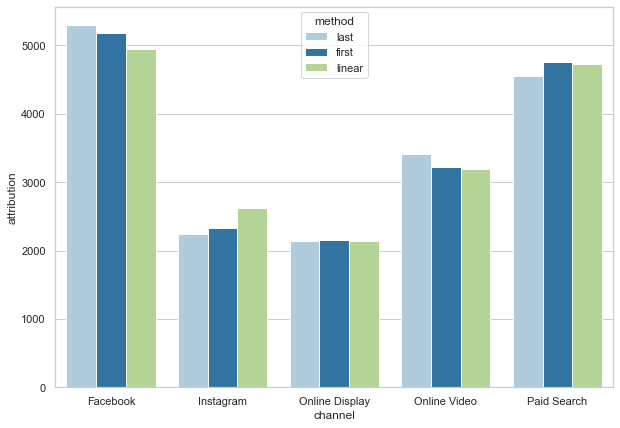

In [75]:
sns.set_theme(style='whitegrid', palette='Paired')
g = sns.barplot(x=total_data.channel, y=total_data.attribution, hue=total_data.method)
g.figure.set_size_inches(10, 7)

Facebook의 경우 마지막 채널에 노출되었을 때 전환율이 높고,<br>
Instagram의 경우 여러 채널에 노출되었을 때 전환율이 높다.<br>
Paid Search의 경우도 Instagram하고 비슷한 경향을 보인다.<br>
Online Display의 경우 각 기여도가 차이가 거의 없기 때문에 단일 채널에서 전환되는 경향이 있다.